In [9]:
import pandas as pd 
data = pd.read_csv('daily-website-visitors.csv')
print(data.head())

   Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  
2             2,352              278  
3             2,327              287  
4             2,130              236  


In [10]:
# Remove commas and convert numerical columns to integers
numerical_columns = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
for col in numerical_columns:
    data[col] = data[col].str.replace(',', '').astype(int)


In [11]:
# Calculate basic statistics
total_page_loads = data['Page.Loads'].sum()
average_unique_visits = data['Unique.Visits'].mean()


In [12]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculate daily averages
daily_average_page_loads = data.groupby('Day')['Page.Loads'].mean()


In [13]:
# Calculate traffic by day of the week
day_of_week_traffic = data.groupby('Day.Of.Week')['Page.Loads'].sum()


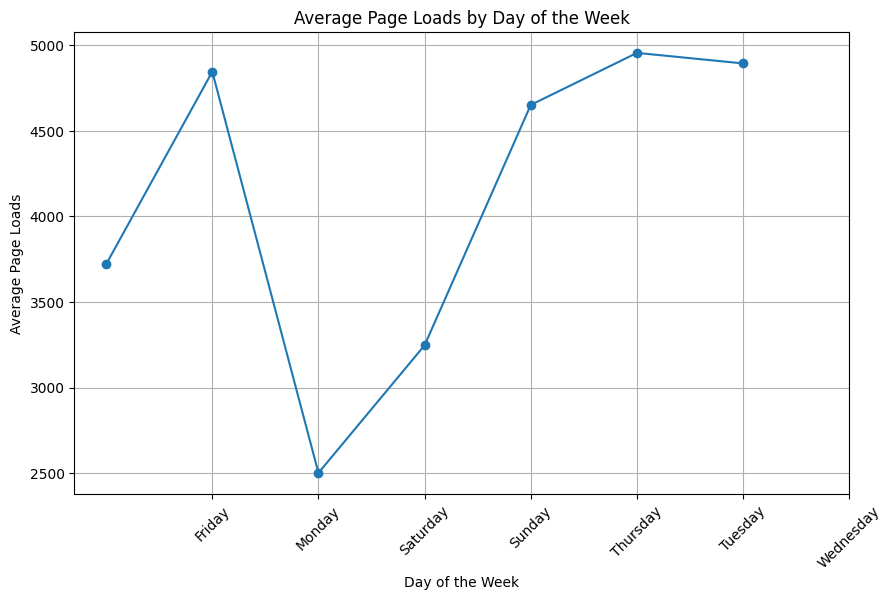

In [14]:
import matplotlib.pyplot as plt

# Plot daily average page loads
plt.figure(figsize=(10, 6))
plt.plot(daily_average_page_loads.index, daily_average_page_loads.values, marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Average Page Loads')
plt.title('Average Page Loads by Day of the Week')
plt.xticks(range(1, 8), daily_average_page_loads.index, rotation=45)
plt.grid(True)
plt.show()


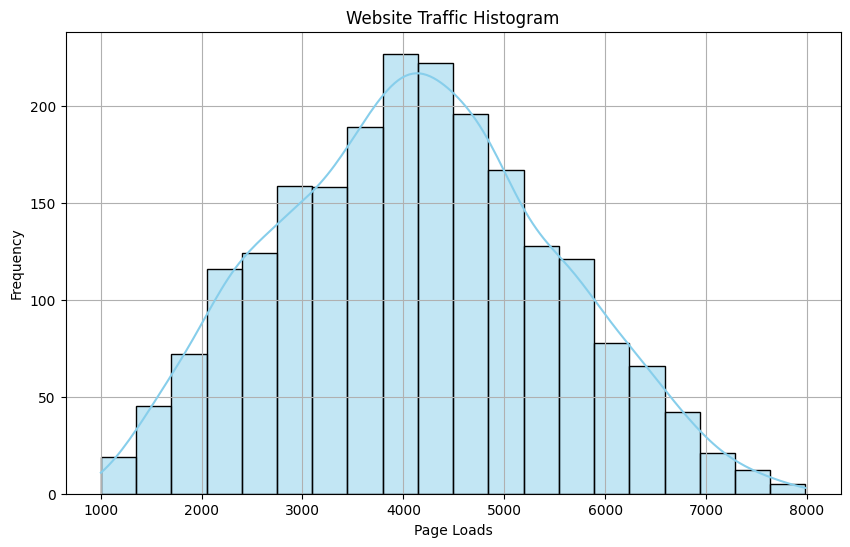

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data['Page.Loads'], bins=20, kde=True, color='skyblue')
plt.title('Website Traffic Histogram')
plt.xlabel('Page Loads')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

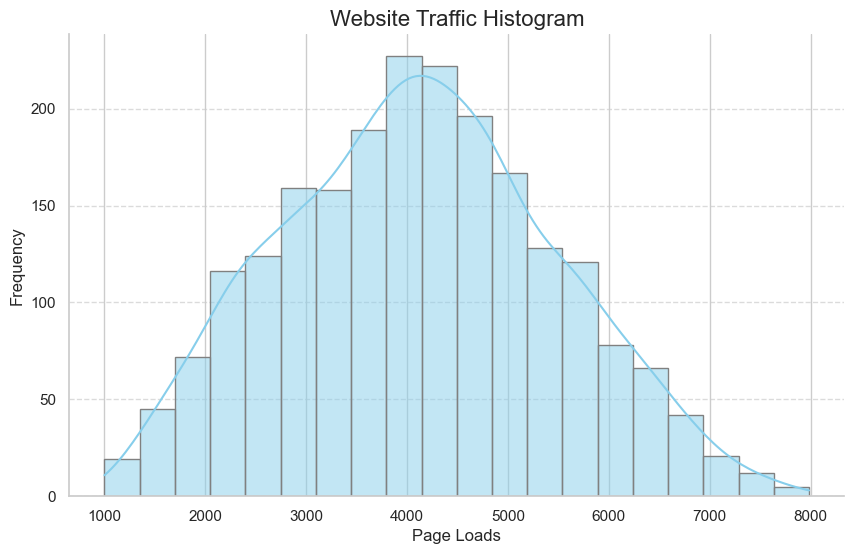

In [18]:
colors = ["#4c72b0"]  # You can add more colors to the list
sns.set_palette(sns.color_palette(colors))

# Create a histogram using Seaborn with customized aesthetics
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the histogram with Seaborn
sns.histplot(data['Page.Loads'], bins=20, kde=True, color='skyblue', edgecolor='gray')

# Add titles and labels
plt.title('Website Traffic Histogram', fontsize=16)
plt.xlabel('Page Loads', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
sns.despine()

# Customize the background color
sns.set(style='whitegrid')

# Add annotations or other visual elements as needed

plt.show()